In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

In [10]:
data = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x = data[:,0:8]
y = data[:,8]

seed = 7
test_size = 0.33
#split data into tain and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
#fit model on training data
model = XGBClassifier()
model.fit(X_train, Y_train)
#make predictions
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
predictions

# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


In [16]:
eval_set = [(X_test, Y_test)]
model.fit(X_train, Y_train, eval_metric='error', eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.259843
[1]	validation_0-error:0.26378
[2]	validation_0-error:0.26378
[3]	validation_0-error:0.255906
[4]	validation_0-error:0.255906
[5]	validation_0-error:0.26378
[6]	validation_0-error:0.23622
[7]	validation_0-error:0.255906
[8]	validation_0-error:0.248031
[9]	validation_0-error:0.248031
[10]	validation_0-error:0.248031
[11]	validation_0-error:0.232283
[12]	validation_0-error:0.228346
[13]	validation_0-error:0.228346
[14]	validation_0-error:0.228346
[15]	validation_0-error:0.228346
[16]	validation_0-error:0.228346
[17]	validation_0-error:0.228346
[18]	validation_0-error:0.224409
[19]	validation_0-error:0.232283
[20]	validation_0-error:0.232283
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.232283
[24]	validation_0-error:0.228346
[25]	validation_0-error:0.228346
[26]	validation_0-error:0.224409
[27]	validation_0-error:0.224409
[28]	validation_0-error:0.228346
[29]	validation_0-error:0.232283
[30]	validation_0-error:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [18]:
model.fit(X_train,Y_train, early_stopping_rounds=10,eval_metric='logloss', eval_set=eval_set, verbose=True)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.61224
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.519769
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


# Feature Importance with XGBoost

In [19]:
print(model.feature_importances_)

[0.07890794 0.30844045 0.06064048 0.07164859 0.10541682 0.16903177
 0.10197888 0.10393505]


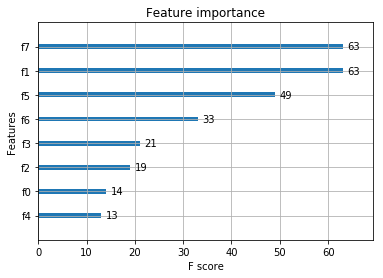

In [22]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()

# How to Configure Gradient Boosting
- Learning rate or shrinkage (**learning_rate in XGBoost)** should be set to 0.1 or lower, and smaller values will require the addition of more trees.
- The depth of trees (**tree_depth in XGBoost)** should be configured in the range of 2-to-8, where not much benefit is seen with deeper trees.
- Row sampling (**subsample in XGBoost)** should be configured in the range of 30% to 80% of the training dataset, and compared to a value of 100% for no sampling.

# XGBoost Hyperparameter Tuning
- use **GridSearchCV**


In [25]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold


n_estimators = [50,100,1500,200]
max_depth = [2,4,6,8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

kfold= StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid,
                           scoring='neg_log_loss',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=1)
result = grid_search.fit(x, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   29.8s finished
/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
result.best_params_


{'max_depth': 2, 'n_estimators': 100}

In [35]:
learning_rate=[0.0001,0.001,0.01,0.1,0.2,0.3]
param_grid = dict(learning_rate=learning_rate)

grid_search = GridSearchCV(model, param_grid,
                           scoring='neg_log_loss',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=1)
grid_result = grid_search.fit(x, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print('%f (%f) with %r' % (mean, stdev, param))

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best: -0.483304 using {'learning_rate': 0.1}
-0.689811 (0.000475) with {'learning_rate': 0.0001}
-0.661827 (0.004625) with {'learning_rate': 0.001}
-0.531155 (0.028945) with {'learning_rate': 0.01}
-0.483304 (0.055151) with {'learning_rate': 0.1}
-0.515642 (0.061723) with {'learning_rate': 0.2}
-0.554158 (0.067557) with {'learning_rate': 0.3}


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
